In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import numpy as np
from common import *
from plotting import *

In [25]:
map_model_names = {
    'LR+BOW+norm=l2+Structured' : 'CountBoW',
    'LR+Structured' : 'Structured',
    'LSTM(hs=128)+Structured' : 'LSTM',
    'LSTM(hs=128)+Attention(additive)(hs=128)+Structured' : 'LSTM+Attention',
    'CNN(hs=64)(kernels=3,5,7,9)+Structured' : 'CNN',
    'CNN(hs=64)(kernels=3,5,7,9)+Attention(additive)(hs=128)+Structured' : 'CNN+Attention',
}

In [44]:
def get_yr_df(data_name) :
    yr_df = []
    for model in ['baselines', 'Basic', 'Attention'] :
        name = os.path.join('outputs/confidence/', data_name, model)
        if os.path.exists(name) :
            dirs = os.listdir(name)
            for d in sorted(dirs) :
                dirname = os.path.join(name, d)
                model_names = get_all_model(dirname)
                if len(model_names) < 10 :
                    print("Alert , Less models ", data_name, d, len(model_names))
                for n in model_names[:10] :
                    df = json.load(open(os.path.join(n, 'evaluate.json')))
                    vals = {k:v for k, v in df.items()}
                    if d in map_model_names :
                        vals['model'] = map_model_names[d]
                    elif d + '+Structured' in map_model_names :
                        vals['model'] = map_model_names[d+ '+Structured']
                    yr_df.append(vals)
    yr_df = pd.DataFrame(yr_df)
    return yr_df

In [47]:
def plot_confidence_graphs(name, key) :
    df_readmission = get_yr_df(name)
    ax = sns.boxplot(x=key, y='model', data=df_readmission, linewidth=1, 
                     order=['Structured', 'CountBoW', 'LSTM', 'LSTM+Attention', 'CNN', 'CNN+Attention'])
    ax.axes.set_ylabel('')
    ax.axes.set_xlabel(ax.axes.get_xlabel().replace('_', ' ').upper())
    ax.figure.savefig('Text-encoding-EHR/results/' + name + '/Confidence.pdf', bbox_inches='tight')
    sns.despine()
    plt.show()

Alert , Less models  Readmission CNN(hs=64)(kernels=3,5,7,9)+Structured 6


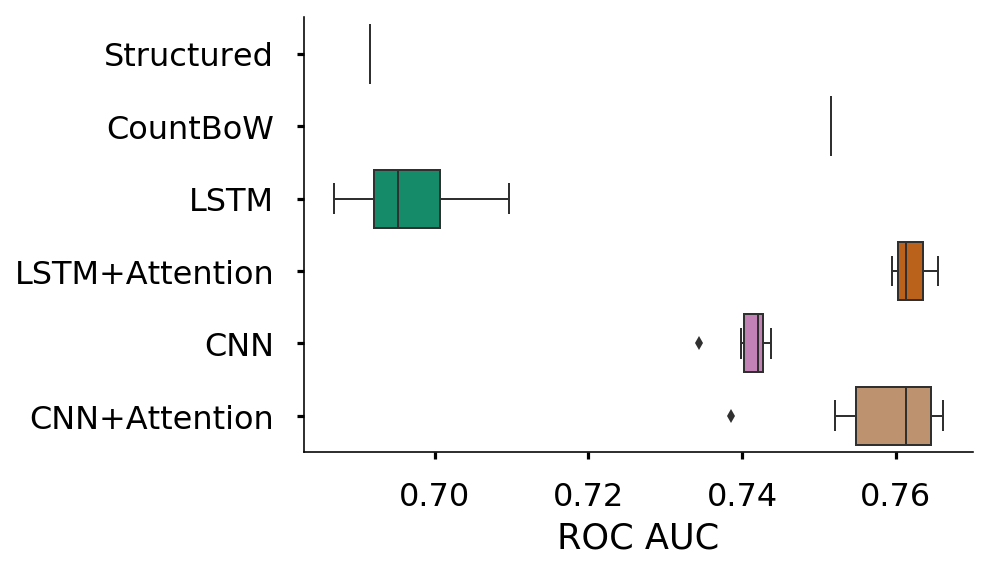

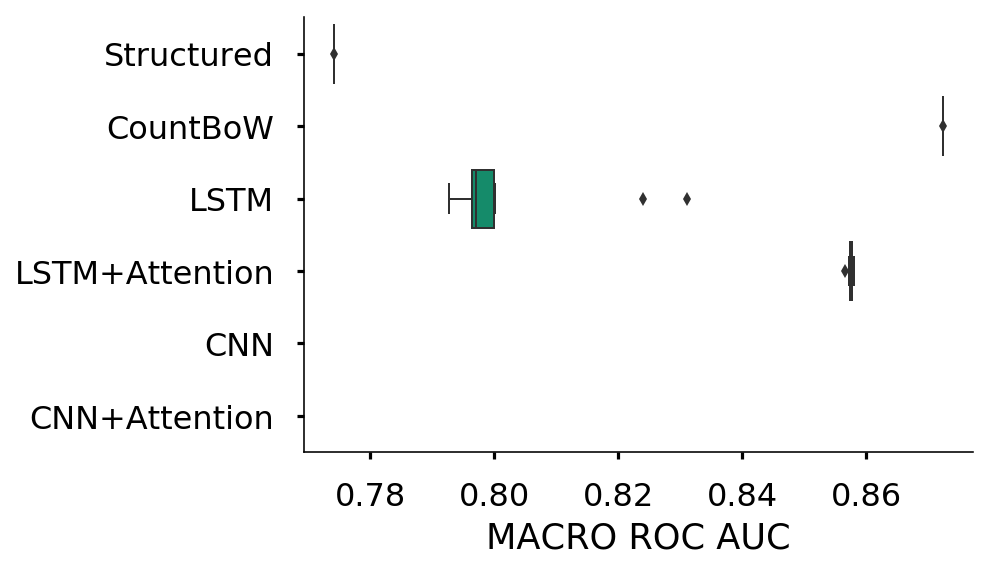

Alert , Less models  Mortality_30day LSTM(hs=128)+Structured 6


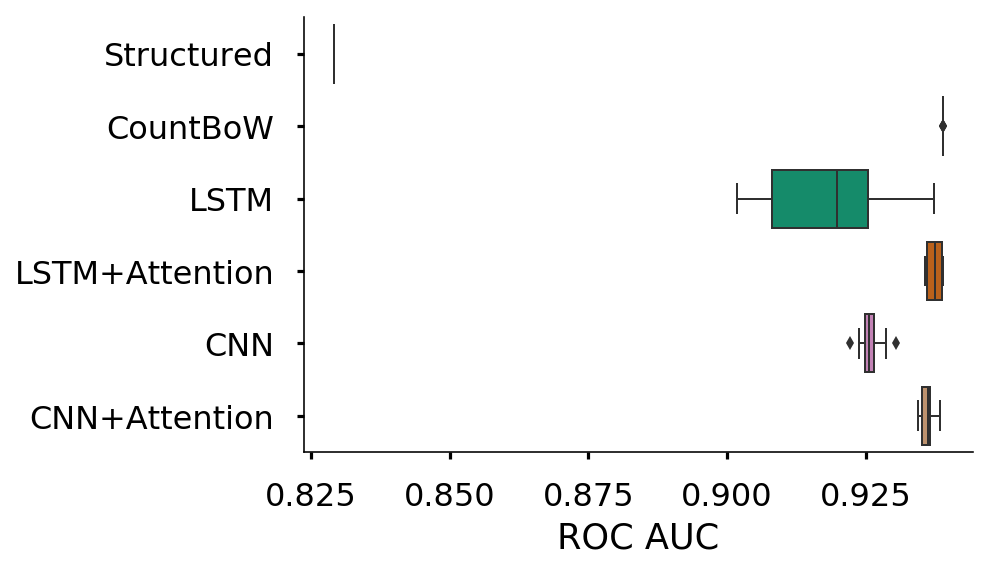

Alert , Less models  Mortality_1yr LR+BOW+norm=l2+Structured 9
Alert , Less models  Mortality_1yr LR+Structured 9


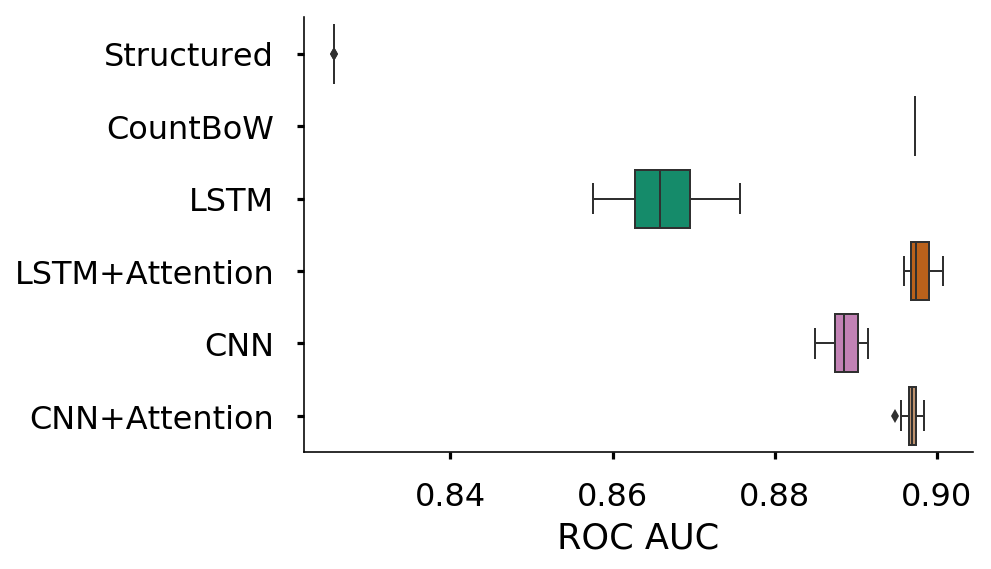

In [48]:
plot_confidence_graphs('Readmission', 'roc_auc')
plot_confidence_graphs('Diagnosis', 'macro_roc_auc')
plot_confidence_graphs('Mortality_30day', 'roc_auc')
plot_confidence_graphs('Mortality_1yr', 'roc_auc')

Alert , Less models  LSTM(hs=128) 8
Alert , Less models  LSTM(hs=128)+Attention(additive)(hs=128) 4


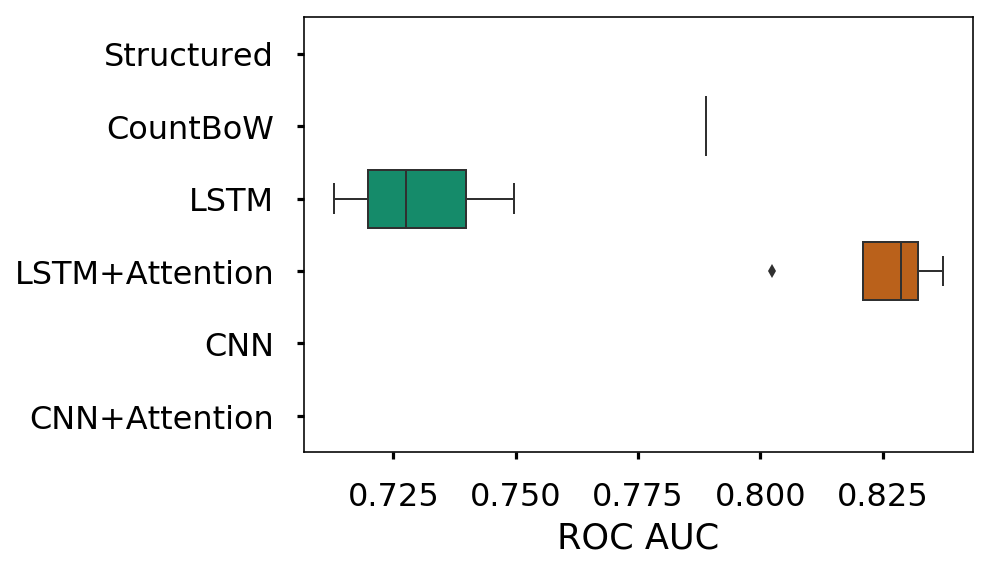

In [42]:
plot_confidence_graphs('HipSurgery_1', 'roc_auc')

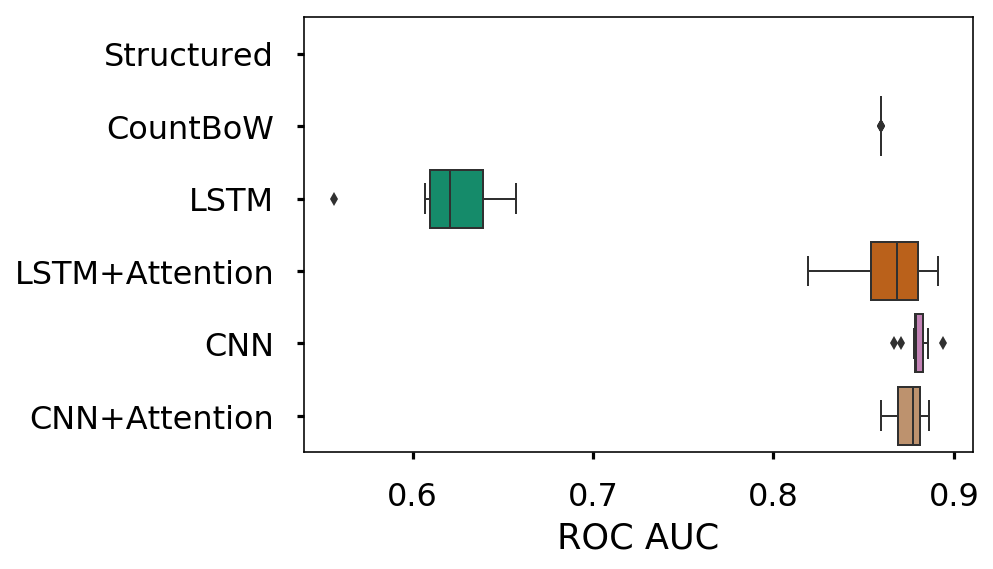

In [43]:
plot_confidence_graphs('KneeSurgery_1', 'roc_auc')